In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as stm

In [2]:
os.chdir(r"C:\Users\vset Info\Downloads")

In [3]:
df=pd.read_csv("winequalityN.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [5]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


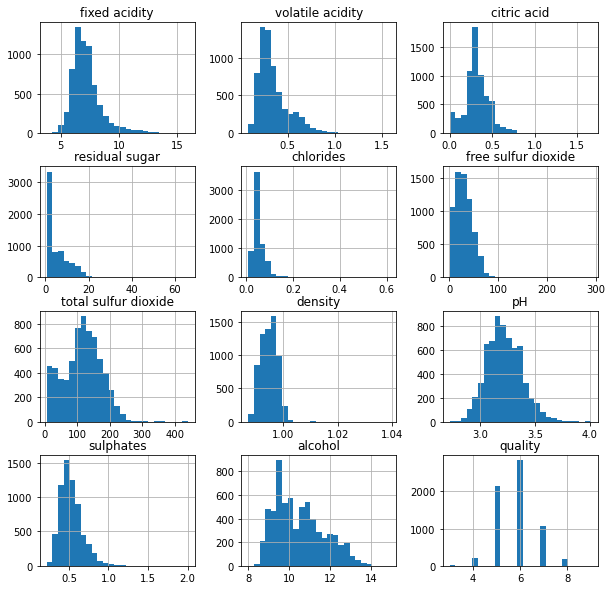

In [9]:
df.hist(bins=25,figsize=(10,10))

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

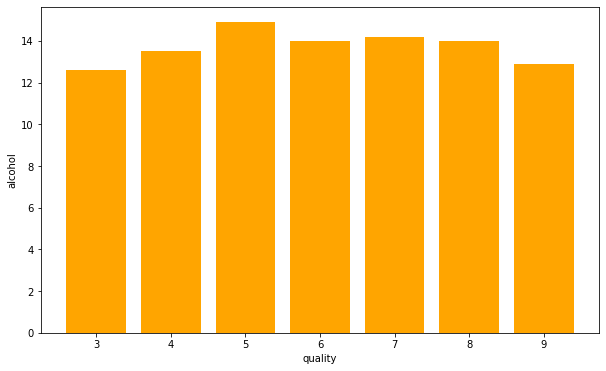

In [55]:
plt.figure(figsize=[10,6])
# plot bar graph
plt.bar(df['quality'],df['alcohol'],color='orange')
# label x-axis
plt.xlabel('quality')
#label y-axis
plt.ylabel('alcohol')
plt.show

In [11]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [12]:
df.update(df.fillna(df.mean()))

C:\Users\VSETIN~1\AppData\Local\Temp/ipykernel_20272/217285154.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.update(df.fillna(df.mean()))


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [14]:
df.type

0       white
1       white
2       white
3       white
4       white
        ...  
6492      red
6493      red
6494      red
6495      red
6496      red
Name: type, Length: 6497, dtype: object

In [15]:
next_df = pd.get_dummies(df,drop_first=True)
# display new dataframe
next_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0


In [16]:
df.columns.values

array(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

# REGRESSION TREE

In [23]:
df1=pd.read_csv("winequalityN.csv")

In [24]:
df1

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
df1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


In [26]:
new_df=df1.drop('total sulfur dioxide',axis=1)

In [27]:
new_df.isnull().sum()

type                    0
fixed acidity          10
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [28]:
new_df.update(new_df.fillna(new_df.median()))

C:\Users\VSETIN~1\AppData\Local\Temp/ipykernel_20272/2452053682.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  new_df.update(new_df.fillna(new_df.median()))


In [29]:
next_df = pd.get_dummies(new_df,drop_first=True)
next_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.51,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5,0


In [30]:
x=next_df.drop(["quality"],axis=1)
y=next_df.quality

# Train-Validation-Test Split

In [31]:
from sklearn.model_selection import train_test_split


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [33]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.25)

# Fitting a Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
reg_tree=DecisionTreeRegressor(max_depth=3,min_samples_leaf=5)#greedy algorithm
reg_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

# Plotting a Regression Tree

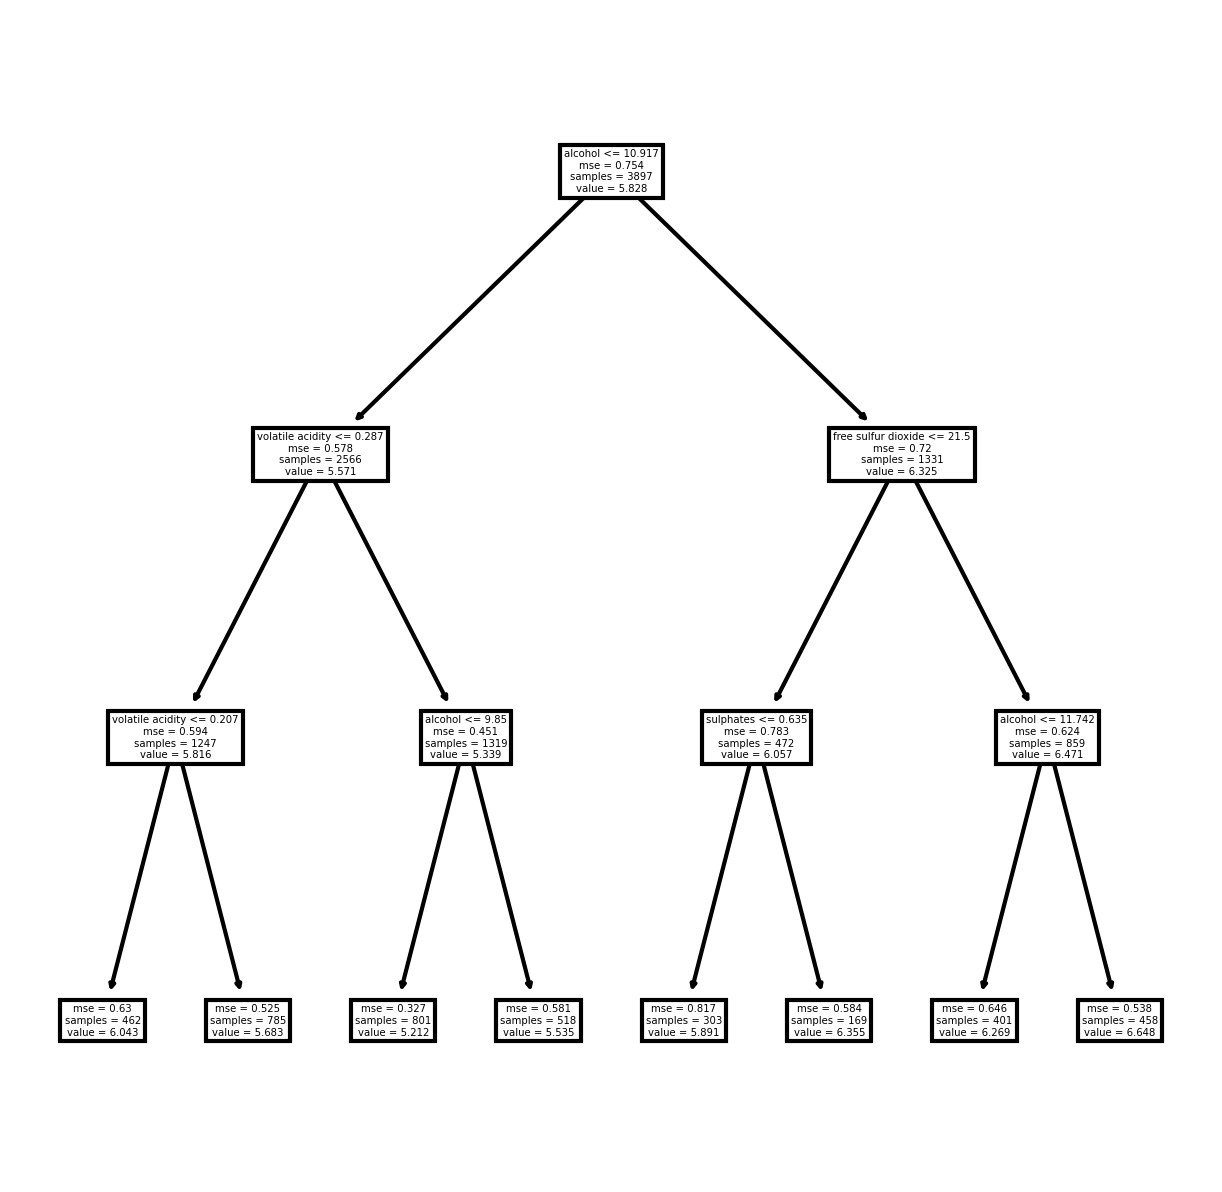

In [36]:
from sklearn import tree
fig,axes=plt.subplots(figsize=(5,5),dpi=300)
tree.plot_tree(reg_tree,feature_names=list(x),filled=False)
plt.show()

# Prediction

In [37]:
y_pred=reg_tree.predict(x_valid)
y_pred

array([6.04329004, 6.64847162, 6.64847162, ..., 6.35502959, 5.68280255,
       5.68280255])

# Model Performance Checks

In [38]:
#MAE
np.mean(np.abs(y_valid-y_pred))

0.5974527030181238

In [39]:
#MSE
np.mean((y_valid- y_pred)**2)

0.6002825770014665

In [40]:
#RMSE
np.sqrt(np.mean((y_valid-y_pred)**2))

0.7747790504404894

In [41]:
#MAPE
np.mean(np.abs(y_valid-y_pred)/y_valid)*100

10.65349416533316

# Hyperparameter Tuning -Choosing Best Depth

In [42]:
depth=np.arange(1,20)
mae=[]
for k in depth:
    reg_tree=DecisionTreeRegressor(max_depth=k,min_samples_leaf=5)
    reg_tree.fit(x_train,y_train)
    y_pred=reg_tree.predict(x_valid)
    mae.append(np.mean(np.abs(y_valid-y_pred))) #MAD

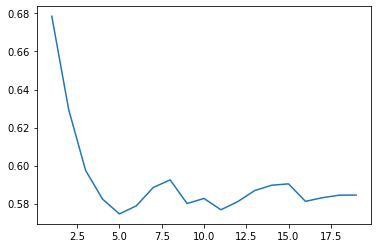

In [43]:
plt.plot(depth,np.array(mae))
plt.show()

# Final Testing

In [44]:
#Fit aDT model of depth 5 on the training data and test its performance on 
#the test data by calculating the MAE
reg_tree=DecisionTreeRegressor(max_depth=5,min_samples_leaf=5)#greedy algorithm
reg_tree.fit(x_train,y_train)
y_pred=reg_tree.predict(x_valid)

np.mean(np.abs(y_valid-y_pred))

0.5745679332630429

In [45]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [46]:
y=df.quality
x=df[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
        'density', 'pH', 'sulphates', 'alcohol']]
x=stm.add_constant(x)
x

E:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol
0,1.0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.450000,8.8
1,1.0,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.490000,9.5
2,1.0,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.440000,10.1
3,1.0,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9
4,1.0,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.400000,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6492,1.0,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.580000,10.5
6493,1.0,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.531215,11.2
6494,1.0,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.750000,11.0
6495,1.0,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.710000,10.2


In [47]:
model=stm.OLS(y,x).fit()


In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     256.4
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:25:38   Log-Likelihood:                -7255.7
No. Observations:                6497   AIC:                         1.453e+04
Df Residuals:                    6486   BIC:                         1.461e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  36.0623     11.710      3.080      0.002      13.106      59.018
fixed acidity           0.0682      0.016      4.366      0.000       0.038       0.099
volatile acidity       -1.3280      0.078    -17.059      0.000      -1.481      -1.175
citric acid            -0.2288      0.079     -2.898      0.004      -0.384      -0.074
residual sugar          0.0323      0.005      6.441      0.000       0.022       0.042
chlorides              -0.1465      0.332     -0.441      0.659      -0.798       0.505
free sulfur dioxide     0.0021      0.001      3.401      0.001       0.001       0.003
density               -35.6097     11.966     -2.976      0.003     -59.066     -12.153
pH                      0.4181      0.091      4.612      0.000       0.240       0.596
sulphates               0.7537      0.077      9.849      0.000       0.604       0.904
alcohol                 0.3080      0.016     19.094      0.000       0.276       0.340
==============================================================================
Omnibus:                      131.033   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.550
Skew:                          -0.009   Prob(JB):                     4.42e-62
Kurtosis:                       4.021   Cond. No.                     6.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
model.predict(x)

0       5.513461
1       5.368166
2       5.799656
3       5.770589
4       5.770589
          ...   
6492    5.473837
6493    5.740794
6494    5.833791
6495    5.422128
6496    5.949726
Length: 6497, dtype: float64

In [50]:
np.sum((y-model.predict(x))**2)

3550.226359708093

In [51]:
#MAE
np.mean(np.abs(y-model.predict(x)))

0.57290643684251

In [52]:
#MSE
np.mean((y-model.predict(x))**2)

0.5464408742047234

In [53]:
#RMSE
np.sqrt(np.mean((y-model.predict(x))**2))

0.7392163920021819

In [54]:
#MAPE
np.mean(np.abs(y_valid-y_pred)/y_valid)*100

10.260720162254316